In [239]:
import pandas as pd
import numpy as np
import seaborn as sns

In [240]:

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [241]:
data1=pd.read_csv("Batsman_Data.csv")
data2=pd.read_csv("Bowler_data.csv")
data3=pd.read_csv("Ground_Averages.csv")
data4=pd.read_csv("ODI_Match_Results.csv")
data5=pd.read_csv("ODI_Match_Totals.csv")
data6=pd.read_csv("WC_players.csv")

# New section

In [242]:
data1.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [243]:
data2.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [244]:
data3.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [245]:
data4.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [246]:
data5.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [247]:
data6.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [248]:


df=[data1,data2, data3, data4, data5, data6]

In [249]:
data4.head(2)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6


In [250]:
def dimensions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [251]:
dimensions(df)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [252]:
def rem_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [253]:
rem_duplicates(df)

(11149, 13)
****************************************************************************************************
(11118, 14)
****************************************************************************************************
(106, 11)
****************************************************************************************************
(1322, 12)
****************************************************************************************************
(1296, 13)
****************************************************************************************************
(152, 3)
****************************************************************************************************


In [254]:
def stats(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [255]:
stats(df)

         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition  \
count   11149.00000  11149  11149  11149  11149  11149  11149        11149   
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

In [256]:
def seperate(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month)
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")

In [257]:
seperate(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [258]:
def drop_wastedata(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]

        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")

In [259]:
drop_wastedata(df)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [260]:
data4

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,lost,10 runs,NaN,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,won,10 runs,NaN,won,1st,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1318,aban,-,NaN,-,-,v Scotland,Edinburgh,ODI # 4138a,SriLanka,8,5,18,2019
1319,-,-,NaN,won,2nd,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1320,-,-,NaN,lost,2nd,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [261]:
df_list=[data1,data2,data3,data4,data5,data6]

In [262]:
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values

In [263]:
label_encode_categorical_columns(df_list)

In [264]:
data4.head(2)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013


In [265]:
data5.head(2)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,404,48.3,165,NaN,1,4,5,57,0,6,7,1,3,2013
1,115,48.0,25,251.0,2,1,11,57,0,4,6,1,3,2013


In [266]:
data4.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [267]:
data5.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [268]:
data4

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6,160,NaN,1,1,5,57,0,6,7,1,3,2013
1,3,160,NaN,2,2,11,57,0,4,6,1,3,2013
2,3,3,NaN,1,2,5,29,1,6,7,1,6,2013
3,6,3,NaN,2,1,11,29,1,4,6,1,6,2013
4,3,10,NaN,1,2,1,63,2,8,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,6,99,3.0,2,2,11,72,755,3,1,5,17,2019
1318,1,0,NaN,0,0,12,38,756,8,8,5,18,2019
1319,0,0,NaN,2,2,6,7,757,0,40,5,19,2019
1320,0,0,NaN,1,2,3,60,758,6,7,5,19,2019


In [269]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_list2 = [data4, data5]

def treat_missing_value(df_list2):
    for i in range(len(df_list2)):
        df_imputed = imputer.fit_transform(df_list2[i])
        df_list2[i] = pd.DataFrame(df_imputed, columns=df_list2[i].columns)
        print("DataFrame", i, "after imputation:")
        print(df_list2[i].isnull().sum()) #Lets Check the Values treated well or not
        print("-------------------------")


In [270]:
treat_missing_value(df_list2)

DataFrame 0 after imputation:
Result        0
Margin        0
BR            0
Toss          0
Bat           0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------
DataFrame 1 after imputation:
Score         0
Overs         0
RPO           0
Target        0
Inns          0
Result        0
Opposition    0
Ground        0
Match_ID      0
Country       0
Country_ID    0
Month         0
Day           0
year          0
dtype: int64
-------------------------


In [271]:
data4=df_list2[0]
data5=df_list2[1]

In [272]:
data4


,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0
2,3.0,3.0,20.689046,1.0,2.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0
3,6.0,3.0,21.548194,2.0,1.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0
4,3.0,10.0,19.527705,1.0,2.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,6.0,99.0,3.000000,2.0,2.0,11.0,72.0,755.0,3.0,1.0,5.0,17.0,2019.0
1318,1.0,0.0,32.599723,0.0,0.0,12.0,38.0,756.0,8.0,8.0,5.0,18.0,2019.0
1319,0.0,0.0,32.327406,2.0,2.0,6.0,7.0,757.0,0.0,40.0,5.0,19.0,2019.0
1320,0.0,0.0,29.815762,1.0,2.0,3.0,60.0,758.0,6.0,7.0,5.0,19.0,2019.0


In [273]:
batsman_join_bowler=pd.merge(data1,data2,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,319,0,0,0,0,0,9,92,759,113,...,18,2009,49,1,59,1,412,0,0,138
1,319,0,0,0,0,0,9,78,761,113,...,24,2009,12,1,57,3,316,103,77,138
2,319,0,0,0,0,0,9,37,762,113,...,27,2009,0,0,0,0,0,0,0,138
3,319,0,0,0,0,0,4,38,763,113,...,4,2010,55,2,66,3,406,120,70,138
4,319,0,0,0,0,0,9,38,764,113,...,5,2010,49,2,49,1,349,0,0,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,99,57,104,826,2,1,9,40,1758,42,...,25,2018,25,1,42,1,35,0,0,42
11114,203,121,121,1409,22,2,10,36,1809,42,...,28,2019,45,1,19,3,112,5,60,42
11115,167,103,119,969,1,1,10,36,1810,42,...,2,2019,0,0,0,0,0,0,0,42
11116,2,2,141,330,1,1,10,36,1817,42,...,8,2019,37,1,20,2,171,80,83,42


In [274]:
data4.head(2)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0


In [275]:
batsman_join_bowler.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [276]:
data3.columns

Index(['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls',
       'Ave', 'RPO'],
      dtype='object')

In [277]:
batsman_join_bowler_GrondAvg=pd.merge(batsman_join_bowler,data3,on=['Ground'], how='inner')
batsman_join_bowler_GrondAvg

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Span,Mat,Won,Tied,NR,Runs,Wkts_y,Balls,Ave_y,RPO
0,319,0,0,0,0,0,9,92,759,113,...,6,16,14,0,2,6890,202,7508,34.10,5.50
1,12,7,21,1757,24,10,9,92,84,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
2,217,128,104,240,3,1,9,92,391,20,...,6,16,14,0,2,6890,202,7508,34.10,5.50
3,184,111,81,572,20,1,9,92,759,11,...,6,16,14,0,2,6890,202,7508,34.10,5.50
4,319,0,0,0,0,0,9,92,927,25,...,6,16,14,0,2,6890,202,7508,34.10,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,217,128,117,1780,22,2,10,36,1817,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9075,180,109,84,389,13,9,10,36,1819,117,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9076,203,121,121,1409,22,2,10,36,1809,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02
9077,167,103,119,969,1,1,10,36,1810,42,...,4,4,4,0,0,1664,56,1987,29.71,5.02


In [278]:
batsman_join_bowler_GrondAvg.columns


Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [279]:
data4.head(2)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,6.0,160.0,52.000182,1.0,1.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0
1,3.0,160.0,52.728414,2.0,2.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0


In [280]:
data4.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [281]:
data5.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [282]:
data6.columns

Index(['Player', 'ID', 'Country'], dtype='object')

In [283]:
OD_Total_result=pd.merge(data5,data4,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Score,Overs,RPO,Target,Inns,Result_x,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,404.0,48.3,165.0,241.723435,1.0,4.0,5.0,57.0,0.0,6.0,7.0,1.0,3.0,2013.0,6.0,160.0,52.000182,1.0,1.0,0.0
1,115.0,48.0,25.0,251.000000,2.0,1.0,11.0,57.0,0.0,4.0,6.0,1.0,3.0,2013.0,3.0,160.0,52.728414,2.0,2.0,0.0
2,93.0,48.5,18.0,168.000000,2.0,1.0,5.0,29.0,1.0,6.0,7.0,1.0,6.0,2013.0,3.0,3.0,20.689046,1.0,2.0,1.0
3,120.0,43.4,48.0,176.027214,1.0,4.0,11.0,29.0,1.0,4.0,6.0,1.0,6.0,2013.0,6.0,3.0,21.548194,2.0,1.0,1.0
4,199.0,40.0,146.0,306.000000,2.0,1.0,1.0,63.0,2.0,8.0,8.0,1.0,11.0,2013.0,3.0,10.0,19.527705,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,750.0,50.0,309.0,382.947700,1.0,1.0,3.0,72.0,739.0,6.0,7.0,5.0,17.0,2019.0,3.0,99.0,3.000000,1.0,1.0,755.0
1292,753.0,49.3,315.0,341.000000,2.0,4.0,11.0,72.0,739.0,3.0,1.0,5.0,17.0,2019.0,6.0,99.0,3.000000,2.0,2.0,755.0
1293,27.0,33.0,38.0,211.000000,2.0,0.0,6.0,7.0,740.0,0.0,40.0,5.0,19.0,2019.0,0.0,0.0,32.327406,2.0,2.0,757.0
1294,187.0,31.5,249.0,352.000000,2.0,0.0,3.0,60.0,741.0,6.0,7.0,5.0,19.0,2019.0,0.0,0.0,29.815762,1.0,2.0,758.0


In [284]:
batsman_join_bowler_GrondAvg_OD=pd.merge(batsman_join_bowler_GrondAvg,OD_Total_result,on=['Ground','Month','Day','year'], how='inner')
batsman_join_bowler_GrondAvg_OD

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Opposition_y,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y
0,140,86,14,677,1,1,15,1,1225,113,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
1,140,86,14,677,1,1,15,1,1225,113,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
2,0,1,108,1,1,1,15,1,1225,80,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
3,0,1,108,1,1,1,15,1,1225,80,...,14.0,123.0,6.0,7.0,6.0,154.0,53.000000,1.0,2.0,126.0
4,277,158,141,4,2,1,15,1,1225,78,...,11.0,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,191,115,131,1056,2,2,10,36,1819,99,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1040,284,161,16,1375,22,9,10,36,1819,13,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0
1041,284,161,16,1375,22,9,10,36,1819,13,...,14.0,719.0,7.0,3.0,6.0,144.0,63.153507,1.0,1.0,733.0
1042,180,109,84,389,13,9,10,36,1819,117,...,13.0,719.0,8.0,8.0,3.0,144.0,62.762323,2.0,2.0,733.0


In [285]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y'],
      dtype='object')

In [286]:


data6=data6.rename(columns={'ID':'Player_ID'})

In [287]:
master_after_join=pd.merge(batsman_join_bowler_GrondAvg_OD,data6,on=['Player_ID','Country'], how='inner')
master_after_join

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Match_ID_x,Country,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player
0,0,1,108,1,1,1,15,1,1225,80,...,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0,80
1,0,1,2,1,1,1,15,1,1227,80,...,125.0,8.0,8.0,6.0,73.0,2.000000,1.0,2.0,128.0,80
2,2,2,130,518,1,1,0,1,1750,80,...,648.0,8.0,8.0,3.0,167.0,67.891460,1.0,2.0,662.0,80
3,319,0,0,0,0,0,3,2,1106,80,...,4.0,8.0,8.0,6.0,154.0,59.000000,2.0,2.0,4.0,80
4,277,158,141,4,2,1,15,1,1225,78,...,123.0,8.0,8.0,3.0,154.0,53.000000,2.0,1.0,126.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,319,0,0,0,0,0,13,5,1590,9,...,488.0,7.0,3.0,6.0,131.0,106.000000,2.0,2.0,501.0,9
506,154,96,109,946,18,1,17,5,1590,93,...,488.0,5.0,5.0,3.0,131.0,106.000000,1.0,1.0,501.0,94
507,5,3,130,535,13,1,15,5,1485,93,...,383.0,5.0,5.0,6.0,99.0,2.000000,1.0,2.0,393.0,94
508,255,147,74,849,1,1,3,5,1574,93,...,472.0,5.0,5.0,6.0,130.0,57.891035,1.0,1.0,484.0,94


In [288]:
master_after_join['Batting Average'] = master_after_join['Bat1'] / master_after_join['Inns']

print(master_after_join[['Player', 'Batting Average']])

     Player  Batting Average
0        80              0.0
1        80              0.0
2        80              1.0
3        80            159.5
4        78            277.0
..      ...              ...
505       9            159.5
506      94            154.0
507      94              2.5
508      94            255.0
509      94            180.0

[510 rows x 2 columns]


In [289]:
master_after_join['Bowling Average'] = master_after_join['Runs_y'] / master_after_join['Wkts_y']


print(master_after_join[['Player', 'Bowling Average']])

     Player  Bowling Average
0        80         2.733333
1        80         3.933333
2        80         4.600000
3        80         0.941176
4        78         0.000000
..      ...              ...
505       9         0.729167
506      94         1.979167
507      94         1.208333
508      94         0.937500
509      94         0.020833

[510 rows x 2 columns]


In [290]:
master_after_join = master_after_join[master_after_join['BF'] > 0]

In [291]:
master_after_join.head(2)

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Country_ID,Result_y,Margin,BR,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average
0,0,1,108,1,1,1,15,1,1225,80,...,8.0,3.0,154.0,53.0,2.0,1.0,126.0,80,0.0,2.733333
1,0,1,2,1,1,1,15,1,1227,80,...,8.0,6.0,73.0,2.0,1.0,2.0,128.0,80,0.0,3.933333


In [292]:
master_after_join['Strike Rate (Batting)'] = (master_after_join['Bat1'] / master_after_join['BF']) * 100


print(master_after_join[['Player', 'Strike Rate (Batting)']])

     Player  Strike Rate (Batting)
0        80               0.000000
1        80               0.000000
2        80               1.538462
4        78             196.453901
5        78             207.070707
..      ...                    ...
502      57             200.970874
506      94             141.284404
507      94               3.846154
508      94             344.594595
509      94             187.500000

[444 rows x 2 columns]


In [293]:
master_after_join['Economy Rate (Bowling)'] = (master_after_join['Runs_y'] / master_after_join['Overs_y'])



print(master_after_join[['Player', 'Economy Rate (Bowling)']])

     Player  Economy Rate (Bowling)
0        80                0.845361
1        80                1.194332
2        80                1.674757
4        78                0.000000
5        78                0.000000
..      ...                     ...
502      57                1.000000
506      94                2.311436
507      94                1.367925
508      94                0.900000
509      94                0.020000

[444 rows x 2 columns]


In [294]:
master_after_join['Maiden Overs Total'] = master_after_join['Mdns'].sum()

print(master_after_join[['Player', 'Maiden Overs Total']])


     Player  Maiden Overs Total
0        80                 262
1        80                 262
2        80                 262
4        78                 262
5        78                 262
..      ...                 ...
502      57                 262
506      94                 262
507      94                 262
508      94                 262
509      94                 262

[444 rows x 2 columns]


In [295]:
batting_average = master_after_join['Batting Average']
bowling_average = master_after_join['Bowling Average']
strike_rate_batting = master_after_join['Strike Rate (Batting)']
economy_rate_bowling = master_after_join['Economy Rate (Bowling)']
maiden_overs = master_after_join['Maiden Overs Total']


def min_max_scaling(x):
    return (x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average)
normalized_bowling_average = min_max_scaling(bowling_average)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
# normalized_maiden_overs = min_max_scaling(maiden_overs) we are not using this its giving NAN


batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25



master_after_join['Player Performance Score'] = (
    batting_weight * normalized_batting_average +
    bowling_weight * normalized_bowling_average +
    strike_rate_weight * normalized_strike_rate_batting +
    economy_rate_weight * normalized_economy_rate_bowling )


print(master_after_join[['Player', 'Player Performance Score']])

     Player  Player Performance Score
0        80                  0.179688
1        80                  0.256694
2        80                  0.324796
4        78                  0.267204
5        78                  0.102335
..      ...                       ...
502      57                  0.327119
506      94                  0.423807
507      94                  0.166335
508      94                  0.363639
509      94                  0.177696

[444 rows x 2 columns]


In [296]:
master_after_join.shape



(444, 55)

In [297]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

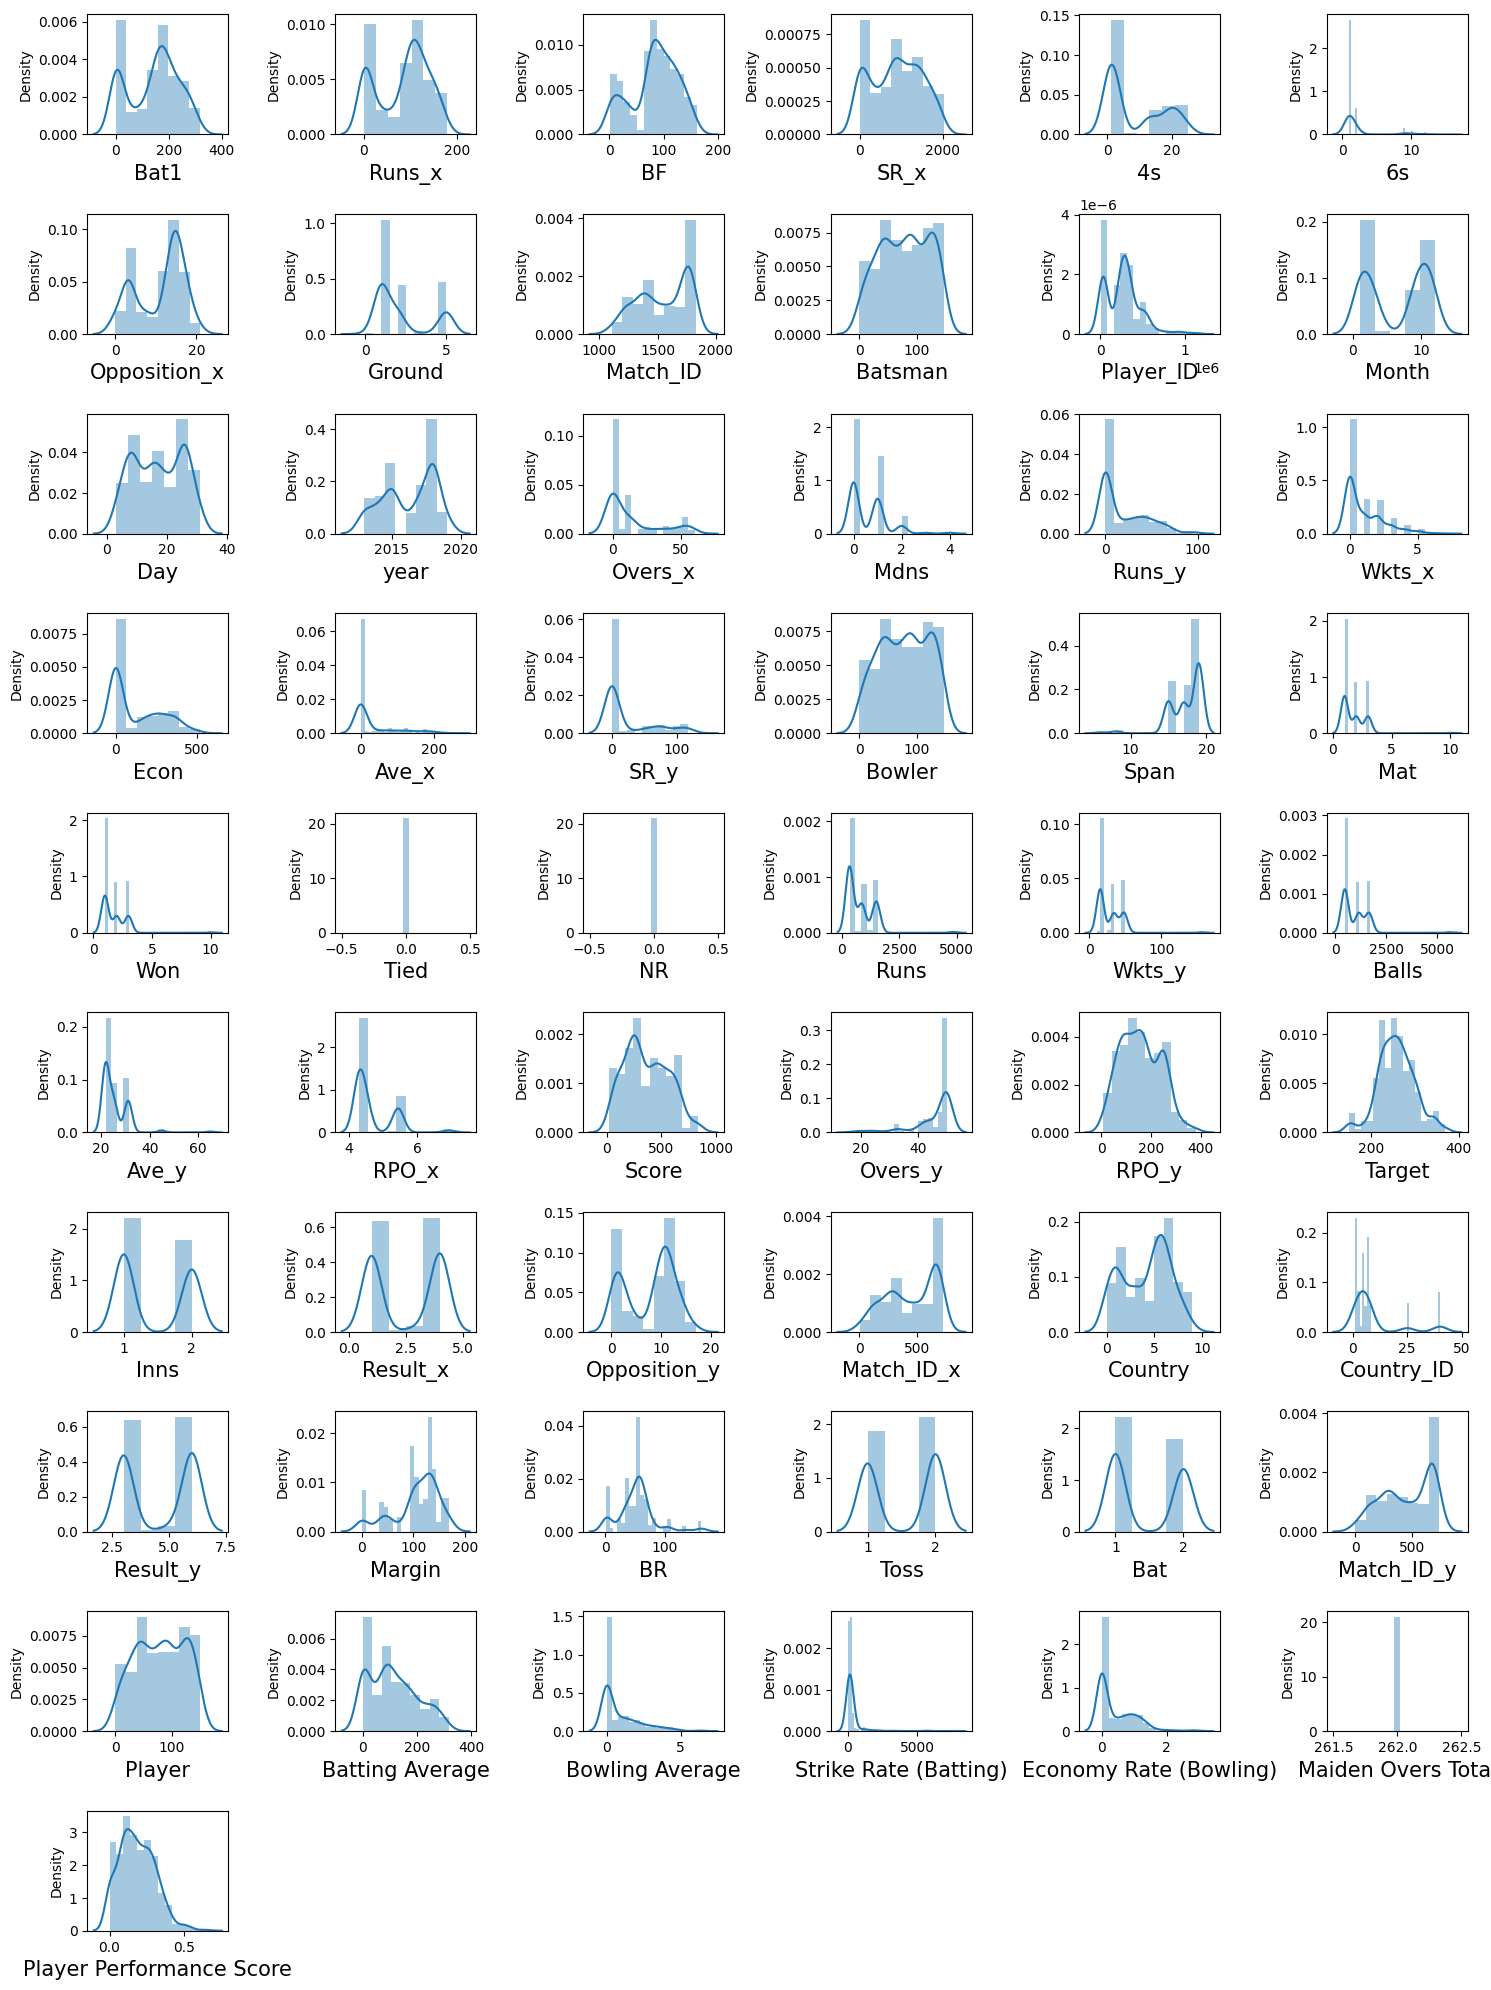

In [298]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [299]:
master_after_join.skew()


Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.578048
6s                          2.952126
Opposition_x               -0.516344
Ground                      0.970068
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                   0.979422
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     1.262778
Mdns                        1.473151
Runs_y                      1.019444
Wkts_x                      1.420556
Econ                        0.740863
Ave_x                       1.770862
SR_y                        1.372929
Bowler                     -0.097655
Span                       -2.101193
Mat                         3.289249
Won                         3.289249
Tied                        0.000000
NR                          0.000000
R

In [300]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
       'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_x',
       'Opposition_y', 'Match_ID_x', 'Country', 'Country_ID', 'Result_y',
       'Margin', 'BR', 'Toss', 'Bat', 'Match_ID_y', 'Player',
       'Batting Average', 'Bowling Average', 'Strike Rate (Batting)',
       'Economy Rate (Bowling)', 'Maiden Overs Total',
       'Player Performance Score'],
      dtype='object')

In [301]:
master_after_join.skew()[(master_after_join.skew() >= 0.5) & (master_after_join.skew() >= -0.5)]

4s                        0.578048
6s                        2.952126
Ground                    0.970068
Player_ID                 0.979422
Overs_x                   1.262778
Mdns                      1.473151
Runs_y                    1.019444
Wkts_x                    1.420556
Econ                      0.740863
Ave_x                     1.770862
SR_y                      1.372929
Mat                       3.289249
Won                       3.289249
Runs                      2.546417
Wkts_y                    2.866807
Balls                     2.933363
Ave_y                     3.219416
RPO_x                     1.697543
Country_ID                2.054187
BR                        1.052424
Bowling Average           1.558220
Strike Rate (Batting)     5.879068
Economy Rate (Bowling)    1.403963
dtype: float64

In [302]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

In [303]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
master_after_join[skew_col]=pt.fit_transform(master_after_join[skew_col].values)
master_after_join[skew_col]

,4s,6s,Ground,Player_ID,Overs_x,Mdns,Runs_y,Wkts_x,Econ,Ave_x,...,Runs,Wkts_y,Balls,Ave_y,RPO_x,BR,Country_ID,Bowling Average,Bowling Average,Economy Rate (Bowling)
0,-1.026769,-0.583898,-0.800802,-1.180360,1.311568,0.916445,1.131556,0.592840,1.165113,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,1.405157,1.405157,1.112272
1,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.262451,1.647705,1.164318,1.476073,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,1.576443,1.576443,1.370392
2,-1.026769,-0.583898,-0.800802,-1.180360,0.803906,0.916445,1.316390,1.110734,1.201152,1.626443,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.563164,0.524365,1.637546,1.637546,1.579633
4,-0.494699,-0.583898,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,0.108478,0.524365,-0.876094,-0.876094,-0.878602
5,1.161413,2.097507,-0.800802,0.360856,-0.912669,-0.913790,-0.915953,-0.900441,-0.922171,-0.650676,...,-0.942750,-0.915738,-0.943522,-0.907203,-0.845961,-2.044235,0.524365,-0.876094,-0.876094,-0.878602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.279046,-0.583898,1.479571,0.582794,1.193187,0.916445,1.203885,0.592840,1.278368,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.770502,0.770502,1.242550
506,1.161413,-0.583898,1.479571,1.104869,0.839262,0.916445,1.422196,0.592840,1.082721,-0.650676,...,1.285847,1.252428,1.242065,1.372273,1.525265,1.605729,0.022895,1.218694,1.218694,1.733722
507,0.956128,-0.583898,1.479571,1.104869,1.193187,0.916445,1.256476,1.110734,0.599664,1.620341,...,1.285847,1.252428,1.242065,1.372273,1.525265,-2.044235,0.022895,0.880685,0.880685,1.460075
508,-1.026769,-0.583898,1.479571,1.104869,0.803906,1.501488,1.165771,1.538131,1.074806,1.486335,...,1.285847,1.252428,1.242065,1.372273,1.525265,0.261698,0.022895,0.691085,0.691085,1.161777


In [304]:
master_after_join.skew()

Bat1                       -0.233887
Runs_x                     -0.346075
BF                         -0.445824
SR_x                       -0.039165
4s                          0.230032
6s                          1.192112
Opposition_x               -0.516344
Ground                      0.096855
Match_ID                   -0.326713
Batsman                    -0.105322
Player_ID                  -0.198176
Month                      -0.134240
Day                        -0.024541
year                       -0.322862
Overs_x                     0.252258
Mdns                        0.265824
Runs_y                      0.220357
Wkts_x                      0.329869
Econ                        0.183360
Ave_x                       0.903190
SR_y                        0.890700
Bowler                     -0.097655
Span                       -2.101193
Mat                         0.277049
Won                         0.277049
Tied                        0.000000
NR                          0.000000
R

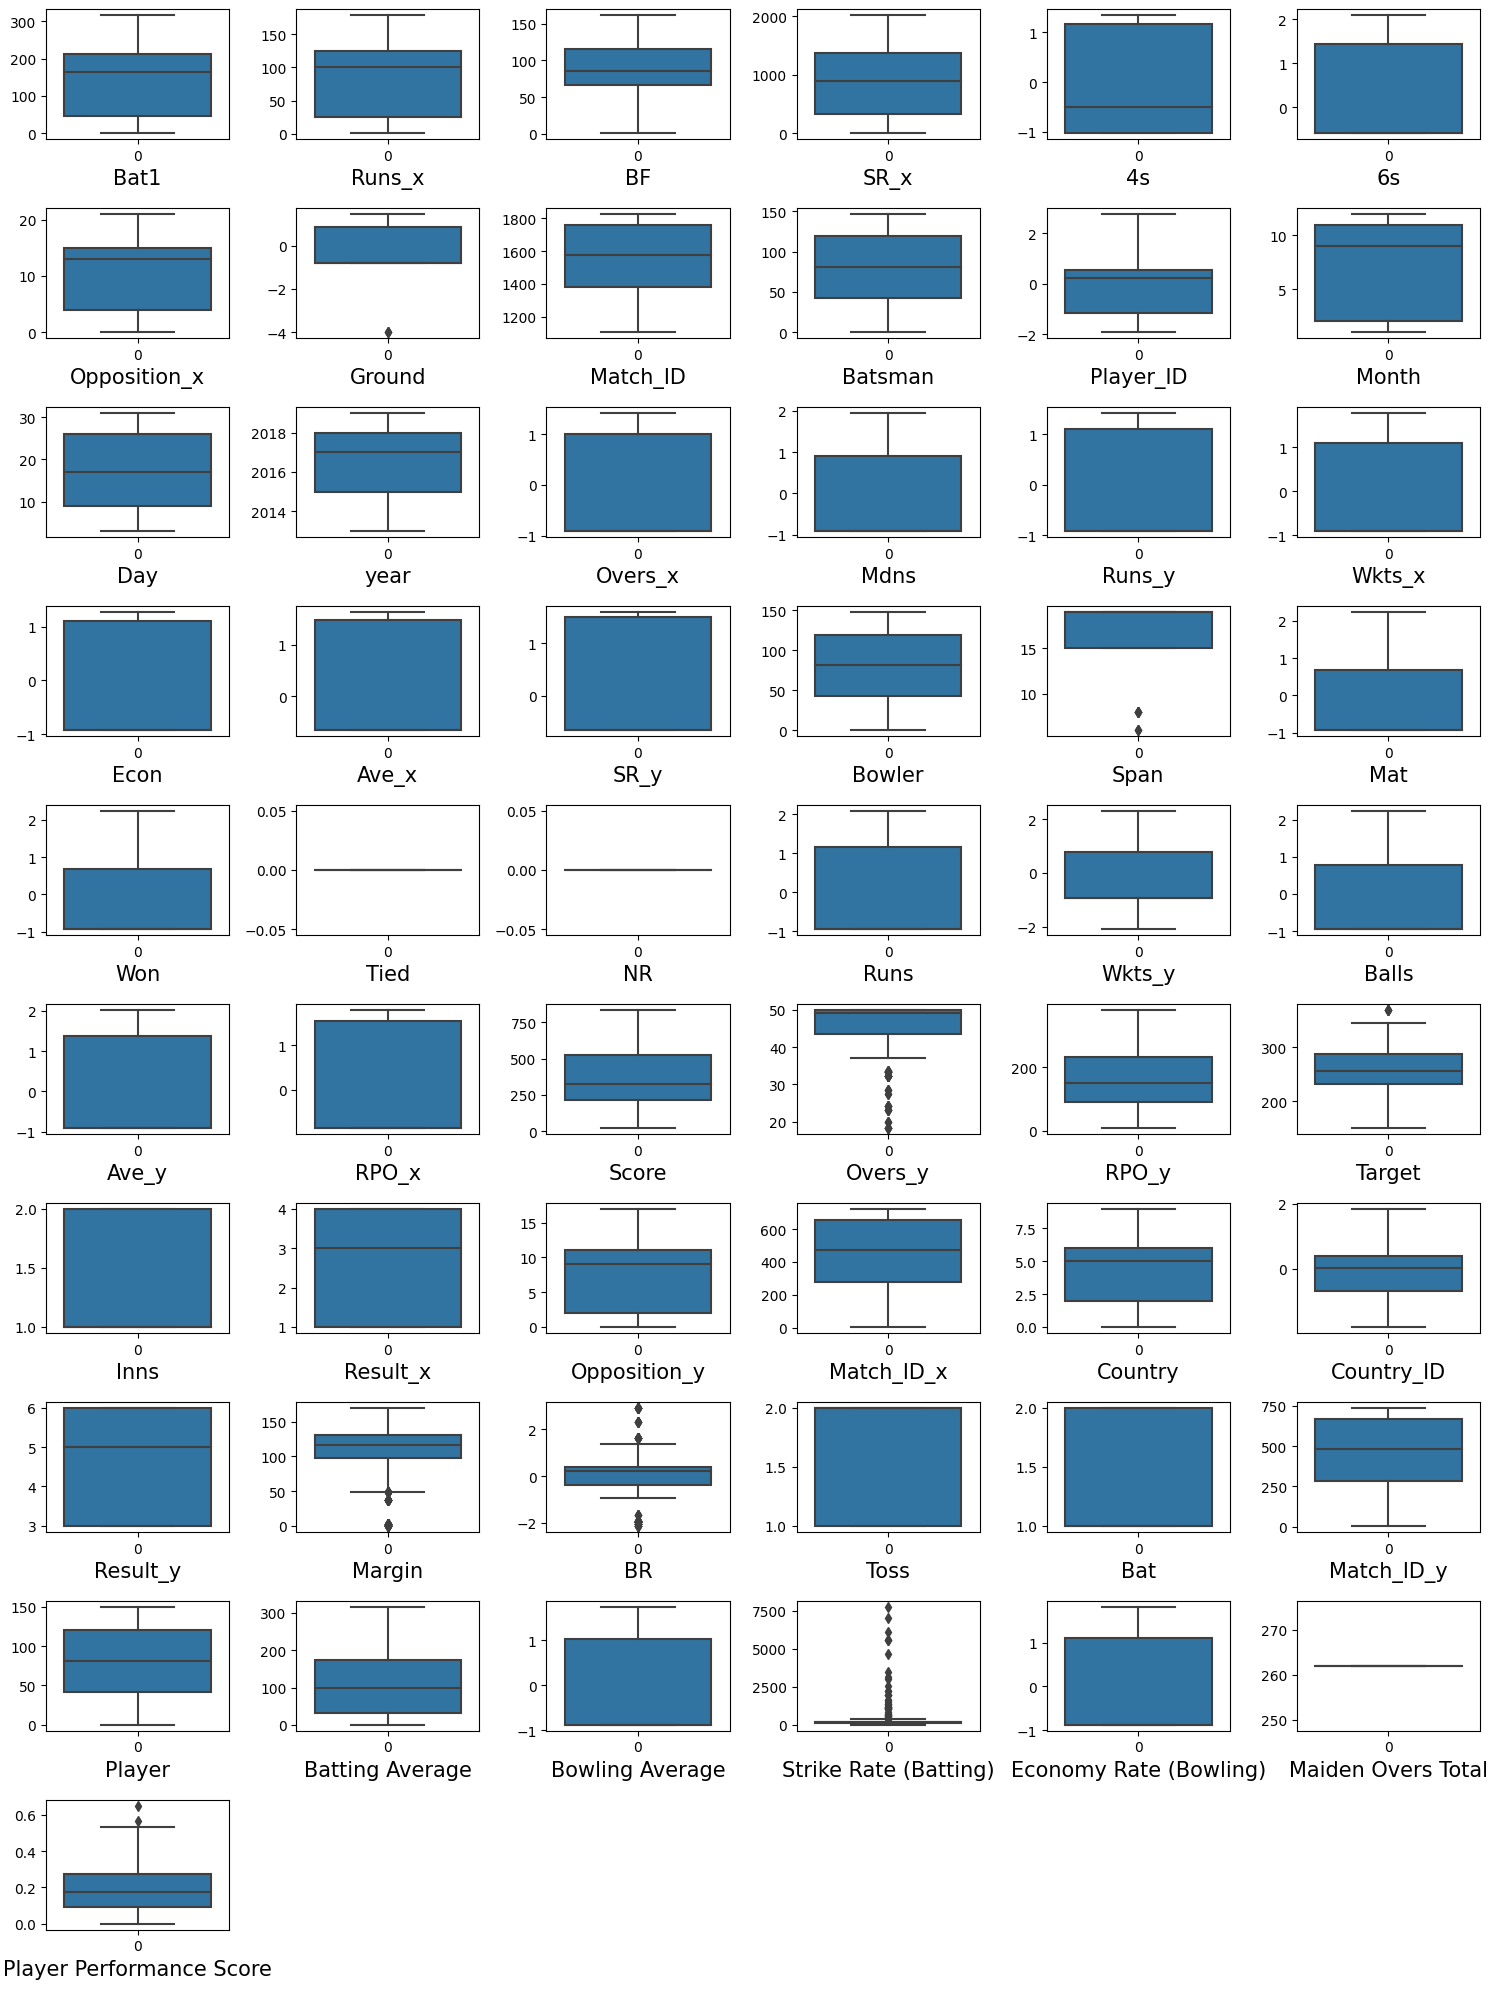

In [305]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [306]:
outliers_col=['Margin', 'BR','Overs_y','Target','Ground','Span','Strike Rate (Batting)','Player Performance Score']

In [307]:
from scipy.stats import zscore
z_score=zscore(master_after_join[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry=(z_score_abs<3).all(axis=1)
master_after_join=master_after_join[filter_entry]
master_after_join.head()

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition_x,Ground,Match_ID,Batsman,...,Toss,Bat,Match_ID_y,Player,Batting Average,Bowling Average,Strike Rate (Batting),Economy Rate (Bowling),Maiden Overs Total,Player Performance Score
0,0,1,108,1,-1.026769,-0.583898,15,-0.800802,1225,80,...,2.0,1.0,126.0,80,0.0,1.405157,0.000000,1.112272,262,0.179688
1,0,1,2,1,-1.026769,-0.583898,15,-0.800802,1227,80,...,1.0,2.0,128.0,80,0.0,1.576443,0.000000,1.370392,262,0.256694
2,2,2,130,518,-1.026769,-0.583898,0,-0.800802,1750,80,...,1.0,2.0,662.0,80,1.0,1.637546,1.538462,1.579633,262,0.324796
4,277,158,141,4,-0.494699,-0.583898,15,-0.800802,1225,78,...,2.0,1.0,126.0,78,277.0,-0.876094,196.453901,-0.878602,262,0.267204
5,205,122,99,256,1.161413,2.097507,15,-0.800802,1227,78,...,1.0,2.0,128.0,78,102.5,-0.876094,207.070707,-0.878602,262,0.102335


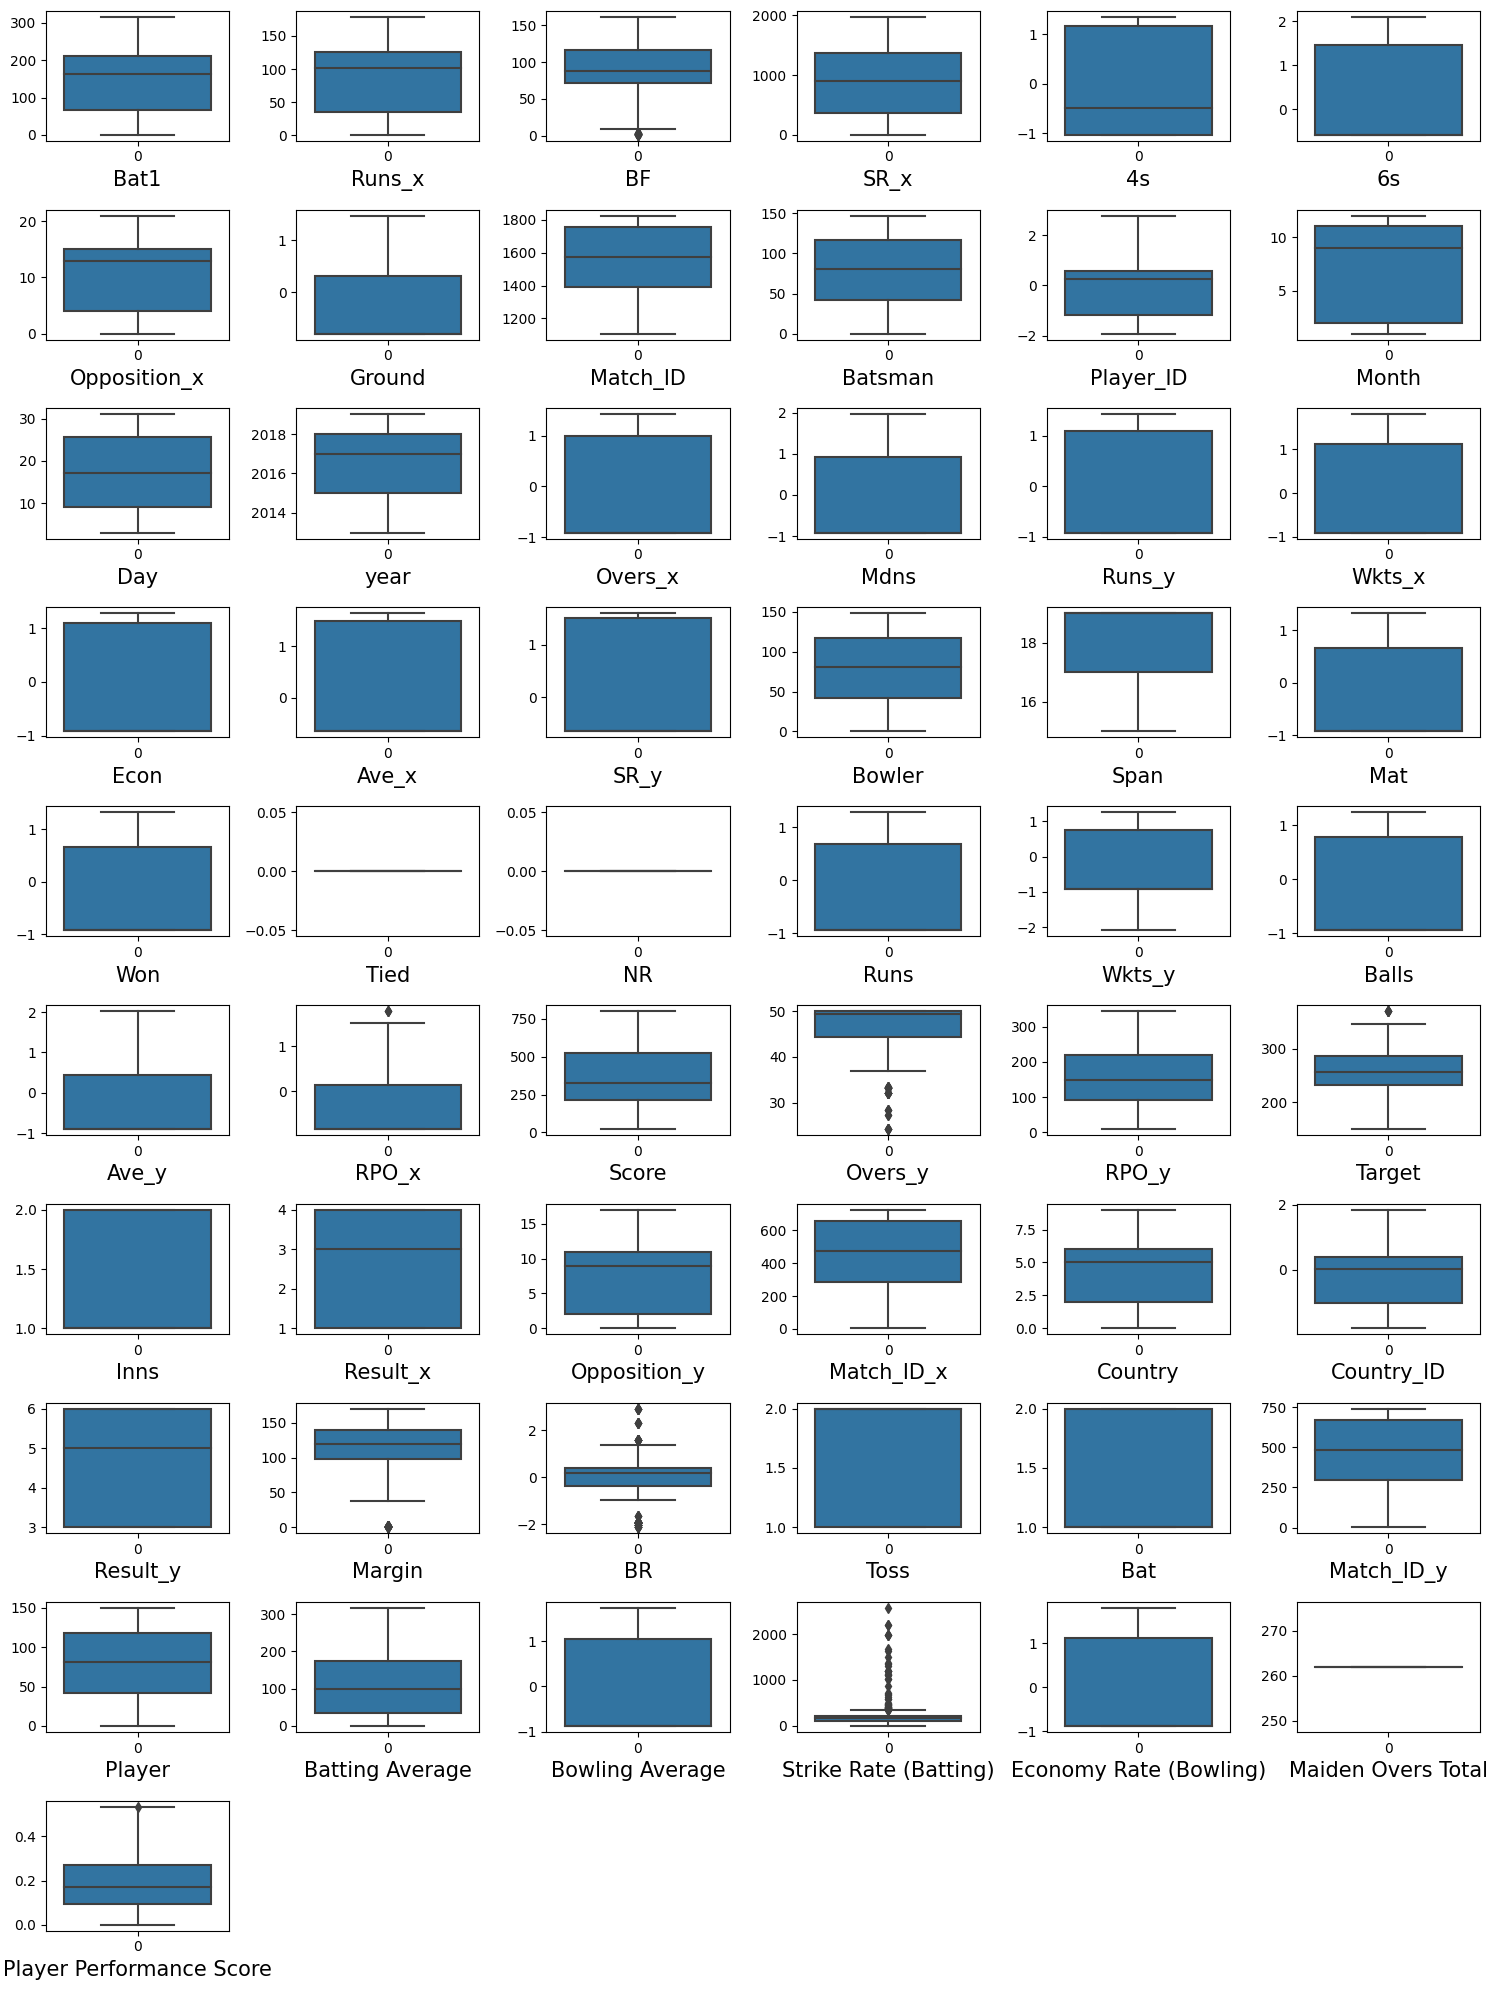

In [308]:
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [309]:
x = master_after_join[['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Ground',
          'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs_x',
          'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
          'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x',
          'Result_x', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition_y', 'Match_ID_x',
          'Country', 'Country_ID', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
          'Result_y', 'Match_ID_y']]

y = master_after_join['Player Performance Score']  # Target column

In [310]:
print(x.shape, y.shape)

(414, 48) (414,)


In [311]:
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

             vif       featurs
0   3.243989e+02          Bat1
1   3.277185e+02        Runs_x
2   1.303874e+00            BF
3   1.315616e+00          SR_x
4   1.607081e+00            4s
5   1.321414e+00            6s
6   9.882804e+01  Opposition_x
7            inf        Ground
8            inf      Match_ID
9   3.778642e+04       Batsman
10  1.215122e+00     Player_ID
11  2.517729e+01         Month
12  1.565335e+00           Day
13  5.229427e+02          year
14  2.793929e+01       Overs_x
15  3.194069e+01          Mdns
16  5.153965e+01        Runs_y
17  6.467949e+01        Wkts_x
18  6.669962e+01          Econ
19  3.003716e+02         Ave_x
20  3.209849e+02          SR_y
21  3.777379e+04        Bowler
22           inf          Span
23           inf           Mat
24           inf           Won
25           NaN          Tied
26           NaN            NR
27           inf          Runs
28           inf        Wkts_y
29           inf         Balls
30           inf         Ave_y
31      

In [313]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)


array([[-2.31006925e+00,  1.08066625e+00,  2.47302187e+00, ...,
        -1.05774003e-15, -3.27523882e-16,  1.59715425e-16],
       [-2.48514790e+00,  2.39461326e+00,  2.79525159e+00, ...,
        -3.29473350e-16, -2.28700818e-16, -6.03060927e-16],
       [-4.02575408e+00,  3.24058708e+00, -3.18452429e+00, ...,
         4.06851389e-16, -4.81869180e-16,  2.72596434e-16],
       ...,
       [ 3.88626932e+00,  3.73177516e+00,  3.30350335e-01, ...,
        -7.12212640e-17, -1.53571152e-17, -6.15387903e-17],
       [ 3.36908499e+00,  4.33164653e+00,  3.12306337e-01, ...,
        -2.34444847e-16,  8.09871199e-17, -1.89444820e-17],
       [ 4.27145979e+00,  1.25346997e+00,  5.55934187e-01, ...,
         2.25913020e-16, -8.96104322e-17, -8.09157079e-17]])

Text(0.5, 1.0, 'PCA Plot')

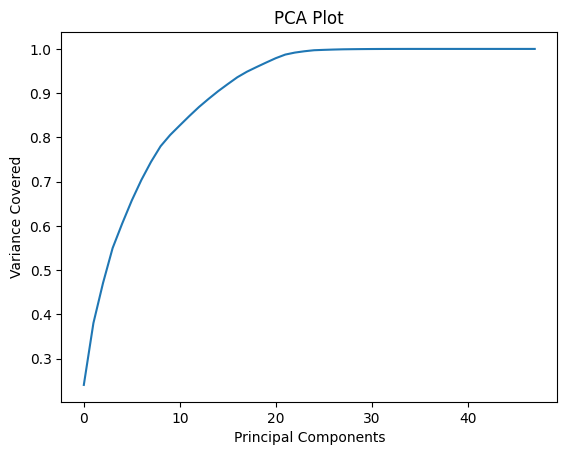

In [314]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

In [315]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.310069,1.080666,2.473022,3.419201,0.719532,3.008466,0.858584,1.192495,1.119055,-0.834009,-0.113265,0.026162,-0.824383,0.456553,0.054640,-1.530483,-1.067383,1.811222,0.732439
1,-2.485148,2.394613,2.795252,3.116287,-1.193668,3.522896,-1.548201,-2.382589,-0.137813,0.613430,-0.044076,-0.053317,-0.117465,1.388368,0.745390,-1.077338,1.188699,-0.941087,-1.558304
2,-4.025754,3.240587,-3.184524,1.698911,-0.689603,0.791114,-0.614372,-0.772360,0.466250,-1.478286,0.132960,-0.490909,0.243706,0.684870,-1.825013,-1.729205,-0.378437,0.144972,0.156525
3,-1.376718,-2.807382,2.072543,2.463956,-1.096219,0.652159,1.456102,2.296638,1.086736,-0.008860,-2.250096,-0.574960,-1.722208,1.336490,-0.670760,0.009680,0.039045,1.668862,0.172293
4,-1.083281,-3.422891,1.900836,1.968804,-3.395546,1.371344,-0.681239,-1.327738,-0.299491,1.499024,-0.969964,1.468178,-1.427204,1.115861,0.130324,-0.011293,-0.602117,-0.429274,-1.055359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3.773496,2.330712,-0.348755,-2.495956,-0.418132,-0.622893,0.375544,-1.127283,1.437581,-1.402458,-0.932074,0.834423,-0.088529,-0.037791,1.728318,-0.333422,-0.659521,2.335788,-0.975762
410,3.105490,2.400781,-1.382504,1.448562,1.540578,-2.652272,-0.528191,2.440662,-1.044925,-0.849262,-0.629356,1.582904,0.619584,-1.269522,1.153895,-0.318073,-1.254852,1.185133,-0.728284
411,3.886269,3.731775,0.330350,-0.943641,-0.395913,1.302100,-1.701910,-2.224492,-1.473293,0.844592,-1.326668,-0.995687,-0.695687,-1.560474,-0.061451,-1.545660,-1.048745,-0.363616,-1.765341
412,3.369085,4.331647,0.312306,-2.838551,-0.797400,-0.961250,-0.516971,-0.626311,1.296161,-1.410446,-1.992295,0.209325,-0.134870,0.362040,0.816394,0.168290,1.382078,0.232333,-0.049511


In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):

    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= i )

    lr = LinearRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_train) # prediction on train data
    r1 =r2_score(y_train,y_pred) # accuracy check on train data

    pred = lr.predict(x_test)   #prediction on test data
    r2 =r2_score(y_test,pred) #accuracy check on test data

    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.8085024636869783
at random sate 1, the testing accuracy is:- 0.7601575152686073


at random sate 2, the training accuracy is:- 0.8085024636869783
at random sate 2, the testing accuracy is:- 0.7601575152686073


at random sate 3, the training accuracy is:- 0.8085024636869783
at random sate 3, the testing accuracy is:- 0.7601575152686073


at random sate 4, the training accuracy is:- 0.8085024636869783
at random sate 4, the testing accuracy is:- 0.7601575152686073


at random sate 5, the training accuracy is:- 0.8085024636869783
at random sate 5, the testing accuracy is:- 0.7601575152686073


at random sate 6, the training accuracy is:- 0.8085024636869783
at random sate 6, the testing accuracy is:- 0.7601575152686073


at random sate 7, the training accuracy is:- 0.8085024636869783
at random sate 7, the testing accuracy is:- 0.7601575152686073


at random sate 8, the training accuracy is:- 0.8085024636869783
at random sate 8, the testing acc

In [317]:
rand_state

152

In [318]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [319]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(289, 19)
(125, 19)
(289,)
(125,)


In [320]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()


import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

In [321]:
m=[]
score=[]
score2=[]
cv_score=[]
MAE_score=[]
MSE_score=[]
for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=r2_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)

    pred=model.predict(x_test)
    AS2=r2_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    MAE=mae(y_test,pred)
    print("Mean Squered Error:",MAE)
    MAE_score.append(MAE*100)
    MSE=mse(y_test,pred)
    print("Mean Absolute Error:", MSE)
    MSE_score.append(MSE*100)

    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LinearRegression ***********************
LinearRegression()
Train Report: 0.8087059866622128
Test Report: 0.7622839055479148
Mean Squered Error: 0.045151985349906776
Mean Absolute Error: 0.0037378396720751704
Accuracy: 83.98 %
Standard Deviation: 1.04 %


*********************** DecisionTreeRegressor ***********************
DecisionTreeRegressor()
Train Report: 1.0
Test Report: 0.3795872445944015
Mean Squered Error: 0.06910361905040624
Mean Absolute Error: 0.009755348772499459
Accuracy: 79.97 %
Standard Deviation: 2.42 %


*********************** AdaBoostRegressor ***********************
AdaBoostRegressor()
Train Report: 0.8099289499729407
Test Report: 0.5969099249196215
Mean Squered Error: 0.061792718661251876
Mean Absolute Error: 0.006338174440935424
Accuracy: 85.27 %
Standard Deviation: 2.10 %


*********************** GradientBoostingRegressor ***********************
GradientBoostingRegressor()
Train Report: 0.9777773545962725
Test Report: 0.6697509229627985

In [322]:
print(len(m),len(score),len(score2),len(cv_score),len(MAE_score),len(MSE_score))

7 7 7 7 7 7


In [323]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score, 'MAE_score':MAE_score,'MSE_score':MSE_score })
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score
0,LinearRegression,80.870599,76.228391,83.980412,4.515199,0.373784
1,DecisionTreeRegressor,100.000000,37.958724,79.970326,6.910362,0.975535
2,AdaBoostRegressor,80.992895,59.690992,85.273528,6.179272,0.633817
3,GradientBoostingRegressor,97.777735,66.975092,94.471030,5.418201,0.519283
4,RandomForestRegressor,94.767318,63.311147,91.540439,5.752228,0.576894
5,XGBRegressor,99.996949,62.222280,91.027339,5.799736,0.594016
6,KNeighborsRegressor,68.716540,55.849085,-4.260913,6.339765,0.694227


In [324]:
result['lest_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,MAE_score,MSE_score,lest_diff
0,LinearRegression,80.870599,76.228391,83.980412,4.515199,0.373784,-7.752021
1,DecisionTreeRegressor,100.000000,37.958724,79.970326,6.910362,0.975535,-42.011602
2,AdaBoostRegressor,80.992895,59.690992,85.273528,6.179272,0.633817,-25.582536
3,GradientBoostingRegressor,97.777735,66.975092,94.471030,5.418201,0.519283,-27.495938
4,RandomForestRegressor,94.767318,63.311147,91.540439,5.752228,0.576894,-28.229292
5,XGBRegressor,99.996949,62.222280,91.027339,5.799736,0.594016,-28.805059
6,KNeighborsRegressor,68.716540,55.849085,-4.260913,6.339765,0.694227,60.109998


In [325]:
from sklearn.model_selection import RandomizedSearchCV

para={'n_jobs':range(1,55)}
rand=RandomizedSearchCV(estimator=LR, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'n_jobs': 10}

In [326]:
LR= LinearRegression(n_jobs= 17)

LR.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=r2_score(y_train,y_pred)
print("Train Report:",AS*100)
pred=LR.predict(x_test)
AS2=r2_score(y_test,pred)
print("Test Report:",AS2*100)
MAE=mae(y_test,pred)
print("Mean Squered Error:",MAE)
MSE=mse(y_test,pred)
print("Mean Absolute Error:", MSE)

accuracies= cross_val_score(LR,x_scaled, y, cv=5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 80.99289499729407
Test Report: 76.22839055479147
Mean Squered Error: 0.045151985349906776
Mean Absolute Error: 0.0037378396720751704
Accuracy: 86.58 %
Standard Deviation: 2.19 %


In [327]:
import pickle
file='Final_CR_Performance_model.pickle'
model=pickle.dump(LR,open(file,'wb'))

In [328]:
#since we found that there is no change in accuracy , this is the best model